In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1-Reading the Dataset
### This dataset about heart failure

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# 2-Preprocessing
### Checking for NaN values

In [3]:
df.isnull().sum() #there is no nan values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Checking the culomns types

In [4]:
df.info() #there is no need to use encoders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Checking rows count

In [5]:
df.count()

age                         299
anaemia                     299
creatinine_phosphokinase    299
diabetes                    299
ejection_fraction           299
high_blood_pressure         299
platelets                   299
serum_creatinine            299
serum_sodium                299
sex                         299
smoking                     299
time                        299
DEATH_EVENT                 299
dtype: int64

### Checking unique values 

In [6]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

# Defining X & y

### Defining X 

In [7]:
X = df.loc[:, df.columns != 'DEATH_EVENT']
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


### Defining y

In [8]:
y = df['DEATH_EVENT']
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='platelets'>

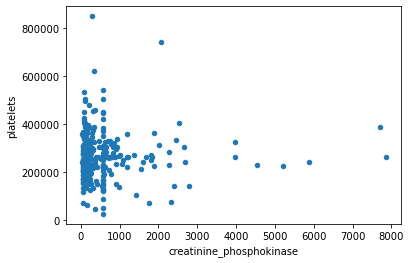

In [9]:
df.plot('creatinine_phosphokinase' , 'platelets' ,kind='scatter')

<AxesSubplot:xlabel='sex', ylabel='DEATH_EVENT'>

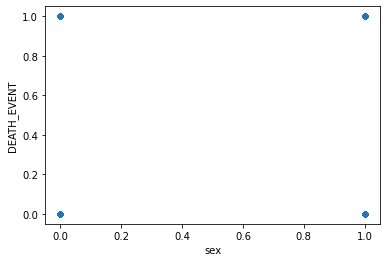

In [10]:
df.plot('sex' , 'DEATH_EVENT' ,kind='scatter')

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='DEATH_EVENT'>

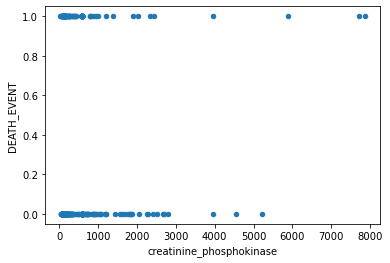

In [11]:
df.plot('creatinine_phosphokinase' , 'DEATH_EVENT' ,kind='scatter')

# 4-Train and Test  Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (239, 12) (239,)
Test set: (60, 12) (60,)


# 5-Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='liblinear').fit(X_train,y_train)
clf

LogisticRegression(solver='liblinear')

In [14]:
y_predict = clf.predict(X_test)
y_predict

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [15]:
y_predict_prob = clf.predict_proba(X_test)
y_predict_prob #propabality of being 0 vs being 1

array([[0.91269422, 0.08730578],
       [0.62403183, 0.37596817],
       [0.694894  , 0.305106  ],
       [0.93574879, 0.06425121],
       [0.43807022, 0.56192978],
       [0.93556171, 0.06443829],
       [0.67527083, 0.32472917],
       [0.12715759, 0.87284241],
       [0.96797715, 0.03202285],
       [0.14832725, 0.85167275],
       [0.91695166, 0.08304834],
       [0.06178038, 0.93821962],
       [0.31165668, 0.68834332],
       [0.87349026, 0.12650974],
       [0.97108339, 0.02891661],
       [0.94699944, 0.05300056],
       [0.99443447, 0.00556553],
       [0.5255964 , 0.4744036 ],
       [0.33003354, 0.66996646],
       [0.27364017, 0.72635983],
       [0.9517713 , 0.0482287 ],
       [0.28709884, 0.71290116],
       [0.95642399, 0.04357601],
       [0.97158732, 0.02841268],
       [0.30237027, 0.69762973],
       [0.91425031, 0.08574969],
       [0.92767345, 0.07232655],
       [0.43563801, 0.56436199],
       [0.910049  , 0.089951  ],
       [0.95600664, 0.04399336],
       [0.

In [16]:
print('Accuracy of Logistic regression classifier on train set:' , clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_test, y_test))

Accuracy of Logistic regression classifier on train set: 0.8368200836820083
Accuracy of Logistic regression classifier on test set: 0.8333333333333334


In [17]:
from sklearn.preprocessing import StandardScaler#MinMaxScaler
scaler = StandardScaler()#MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)


clf = LogisticRegression().fit(X_train_scaled, y_train)

print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_train_scaled, y_train))
print('Accuracy of Logistic regression classifier on test set:' , clf.score(X_test_scaled, y_test))

Accuracy of Logistic regression classifier on test set: 0.8410041841004184
Accuracy of Logistic regression classifier on test set: 0.85


# Ridge

In [18]:
from sklearn.linear_model import Ridge
import numpy as np
linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: 1.5822814535228544
ridge regression linear model coeff:
[ 6.27112992e-03  4.81703152e-03  3.72235040e-05  4.40171499e-02
 -9.99077378e-03 -1.19102242e-02 -3.36150457e-08  7.90041634e-02
 -7.63954686e-03 -2.15617207e-02 -5.19382314e-03 -2.67390816e-03]
R-squared score (training): 0.416
R-squared score (test): 0.405
Number of non-zero features: 12


# Lasso

In [19]:
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=0.1, max_iter = 10000).fit(X_train, y_train)

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test, y_test)))

lasso regression linear model intercept: 1.6743603963039977
lasso regression linear model coeff:
[ 5.93774259e-03  0.00000000e+00  3.77568651e-05  0.00000000e+00
 -9.09270514e-03 -0.00000000e+00 -5.16861781e-08  1.64282060e-03
 -7.39327836e-03 -0.00000000e+00 -0.00000000e+00 -2.83360929e-03]
Non-zero features: 7
R-squared score (training): 0.373
R-squared score (test): 0.395



# Normalization & Lasso

In [20]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=0.2, max_iter = 10000).fit(X_train_scaled, y_train)

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))


lasso regression linear model intercept: 0.3263598326359833
lasso regression linear model coeff:
[ 0.  0.  0.  0. -0.  0. -0.  0. -0.  0.  0. -0.]
Non-zero features: 0
R-squared score (training): 0.000
R-squared score (test): -0.003



# SVM

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

this_C = 1.0

clfc = SVC(this_C,kernel = 'linear',gamma =2.5).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clfc.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clfc.score(X_test, y_test)))
clfc

/Users/sukuna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass C=1.0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Accuracy of RBF-kernel SVC on training set: 0.83
Accuracy of RBF-kernel SVC on test set: 0.82


SVC(gamma=2.5, kernel='linear')

In [22]:
this_C = 5.0

clfc = SVC(this_C,kernel = 'linear',gamma =2.5).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clfc.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clfc.score(X_test, y_test)))
clfc

/Users/sukuna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass C=5.0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Accuracy of RBF-kernel SVC on training set: 0.83
Accuracy of RBF-kernel SVC on test set: 0.82


SVC(C=5.0, gamma=2.5, kernel='linear')

In [53]:
this_C = 5.0  #gamma is low so over fitting

clfc = SVC(this_C,kernel = 'linear',gamma =0.5).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clfc.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clfc.score(X_test, y_test)))
clfc

Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 1.00


/Users/sukuna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass C=5.0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


SVC(C=5.0, gamma=0.5, kernel='linear')

# Linear Svm

When C value is: 1e-05 The Results Are:
Accuracy of RBF-kernel linear SVC on training set: 0.83
Accuracy of RBF-kernel linear SVC  on test set: 0.82
When C value is: 100 The Results Are:
Accuracy of RBF-kernel linear SVC on training set: 0.83
Accuracy of RBF-kernel linear SVC  on test set: 0.82
Coefficients:
 [[ 3.36263548e-05  5.48157965e-07  2.71635351e-06  4.81572787e-07
   1.81991265e-06  1.20641268e-07 -2.82341339e-06  2.07499923e-06
   3.85713728e-05  1.63486063e-07 -4.01499923e-07 -2.31705034e-04]]
Intercepts:
 [3.32958043e-07]


/Users/sukuna/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/sukuna/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


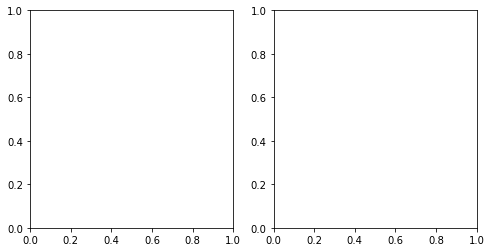

In [23]:
from sklearn.svm import LinearSVC
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))


for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    print('When C value is:',this_C, 'The Results Are:')
    print('Accuracy of RBF-kernel linear SVC on training set: {:.2f}'
     .format(clfc.score(X_train, y_train)))
    print('Accuracy of RBF-kernel linear SVC  on test set: {:.2f}'
     .format(clfc.score(X_test, y_test)))
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)


# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier #KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the K-nearest neighbors Model is',score_knn)

The accuracy of the K-nearest neighbors Model is 0.6333333333333333


# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.87


In [26]:
clf=DecisionTreeClassifier(max_depth =1,min_samples_leaf=5,random_state=0).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.83
Accuracy of Decision Tree classifier on test set: 0.90


In [27]:
clf2 = DecisionTreeClassifier(max_depth =10).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.87


In [28]:
clf2.feature_importances_

array([0.05807185, 0.01512658, 0.07750302, 0.01409522, 0.12485005,
       0.01616088, 0.01843566, 0.17073822, 0.0634326 , 0.01260549,
       0.01680731, 0.41217311])

# PCA

In [29]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [30]:
New_df = df.dropna()

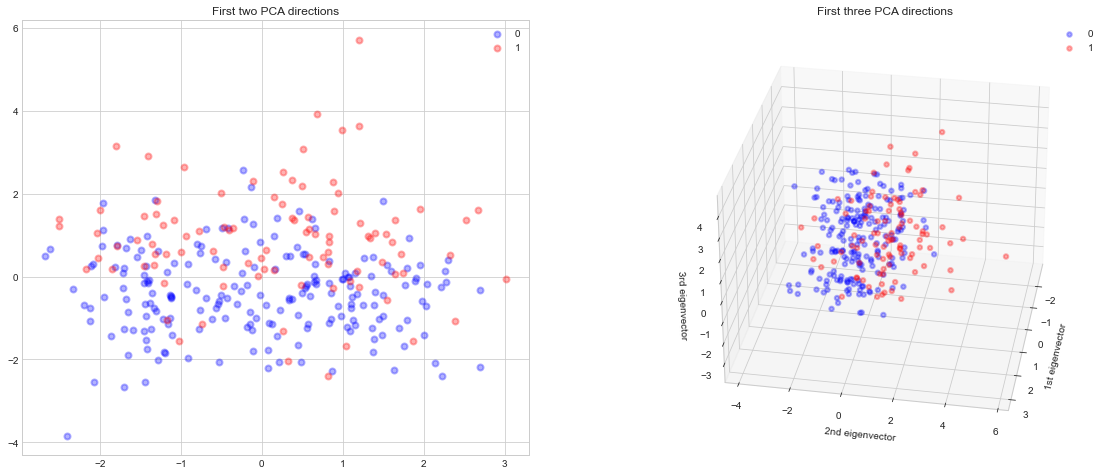

In [31]:
std_scale = preprocessing.StandardScaler().fit(New_df.drop('DEATH_EVENT', axis=1))
X = std_scale.transform(New_df.drop('DEATH_EVENT', axis=1))
y = New_df['DEATH_EVENT']
target_names = [0,1]
colors = ['blue','red','pink']
lw = 2
alpha = 0.3
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');
ax = plt.subplot(1, 2, 2, projection='3d')
pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
ax.view_init(30, 10)

# KMEANS

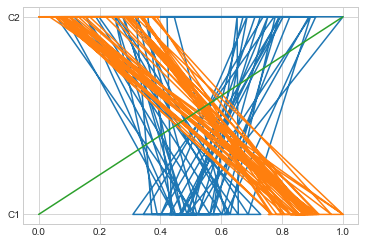

In [32]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
XX,yy=make_blobs(random_state=10)
kmeans=KMeans(n_clusters=2)
from sklearn.preprocessing import MinMaxScaler
X_norm=MinMaxScaler().fit(XX).transform(XX)
kmeans.fit(XX)
plt.plot(X_norm,kmeans.labels_,['C1','C2'])

# Agglomerative Clustering

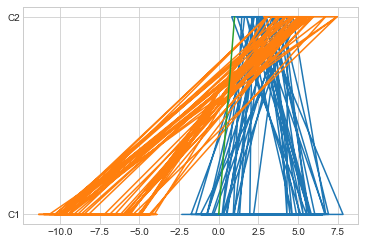

In [33]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
XX,yy=make_blobs(random_state=10)
cls=AgglomerativeClustering(n_clusters=2,linkage='ward')
cls_assignment=cls.fit_predict(XX)

plt.plot(XX,cls_assignment,['C1','C2'])

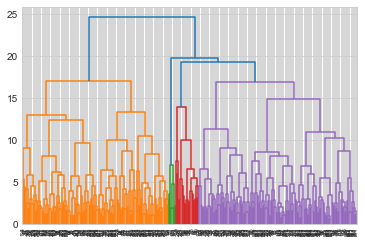

In [34]:
from scipy.cluster.hierarchy import ward,dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

# DBSCAN

In [35]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
X,y=make_blobs(random_state=9,n_samples=25)
dbscan=DBSCAN(eps=2,min_samples=2)
cls=dbscan.fit_predict(X)
cls


array([ 0,  1,  0,  2,  0,  0,  0,  2,  2, -1,  1,  2,  0,  0, -1,  0,  0,
        1, -1,  1,  1,  2,  2,  2,  1])

In [36]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:\t', y[1:60])
print('New binary labels:\t', y_binary_imbalanced[1:60])

Original labels:	 [1 0 2 0 0 0 2 2 1 1 2 0 0 2 0 0 1 1 1 1 2 2 2 1]
New binary labels:	 [1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1]


In [37]:
np.bincount(y_binary_imbalanced)   

array([17,  8])

# Dummy Classifier

In [41]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
y_dummy_predictions = dummy_majority.predict(X_test)

y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
dummy_majority.score(X_test, y_test)

0.7166666666666667

# confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[43  0]
 [17  0]]


In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

Logistic regression classifier (default settings)
 [[40  3]
 [ 5 12]]


In [45]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[40  3]
 [ 6 11]]


In [46]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[43  0]
 [ 6 11]]


# Precision & Recall

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.90
Precision: 1.00
Recall: 0.65
F1: 0.79


In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.88      1.00      0.93        43
           1       1.00      0.65      0.79        17

    accuracy                           0.90        60
   macro avg       0.94      0.82      0.86        60
weighted avg       0.91      0.90      0.89        60



# AUC

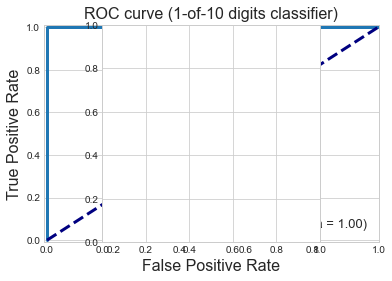

In [49]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

gamma = 0.01  accuracy = 1.00   AUC = 1.00
gamma = 0.10  accuracy = 1.00   AUC = 1.00
gamma = 0.20  accuracy = 1.00   AUC = 1.00
gamma = 1.00  accuracy = 1.00   AUC = 1.00


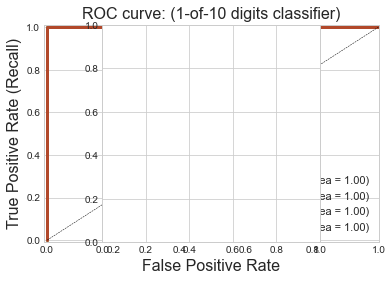

In [50]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()